In [ ]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access a public Github repos
# !rm -rf /content/Brain-Tumor-MRI-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-Tumor-MRI-Dataset.git

/content
Cloning into 'Brain-Tumor-MRI-Dataset'...
remote: Enumerating objects: 6753, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6753 (delta 0), reused 0 (delta 0), pack-reused 6750
Receiving objects: 100% (6753/6753), 140.81 MiB | 35.79 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (7184/7184), done.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [ ]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [ ]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-Tumor-MRI-Dataset"]

for folder in repository_folder:
    local_path = '/content/' + folder + '/dataset'
    DataSetSummary(local_path, 0)
    local_path = '/content/' + folder + '/sample'
    DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Training, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 1339
	-Thư mục: notumor, Số tệp: 1595
	-Thư mục: glioma, Số tệp: 1321
	-Thư mục: pituitary, Số tệp: 1457
-Thư mục: Testing, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 306
	-Thư mục: notumor, Số tệp: 405
	-Thư mục: glioma, Số tệp: 300
	-Thư mục: pituitary, Số tệp: 300
Tổng số thư mục: 2
-Thư mục: Training, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 20
	-Thư mục: notumor, Số tệp: 20
	-Thư mục: glioma, Số tệp: 20
	-Thư mục: pituitary, Số tệp: 20
-Thư mục: Testing, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 20
	-Thư mục: notumor, Số tệp: 20
	-Thư mục: glioma, Số tệp: 20
	-Thư mục: pituitary, Số tệp: 20


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/04_DWT_Processing

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Thesis/04_DWT_Processing'
/content


In [ ]:
# Set the path to your dataset
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Training/meningioma


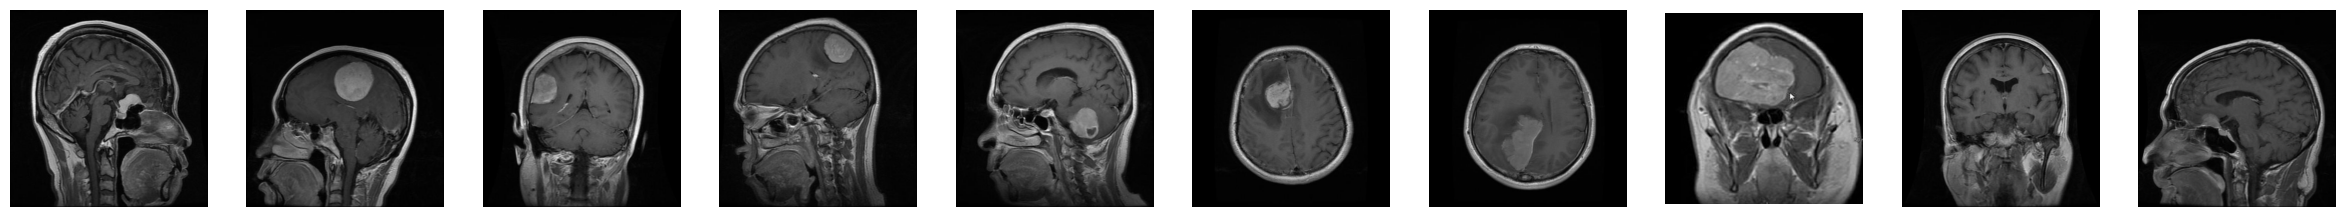

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Training/notumor


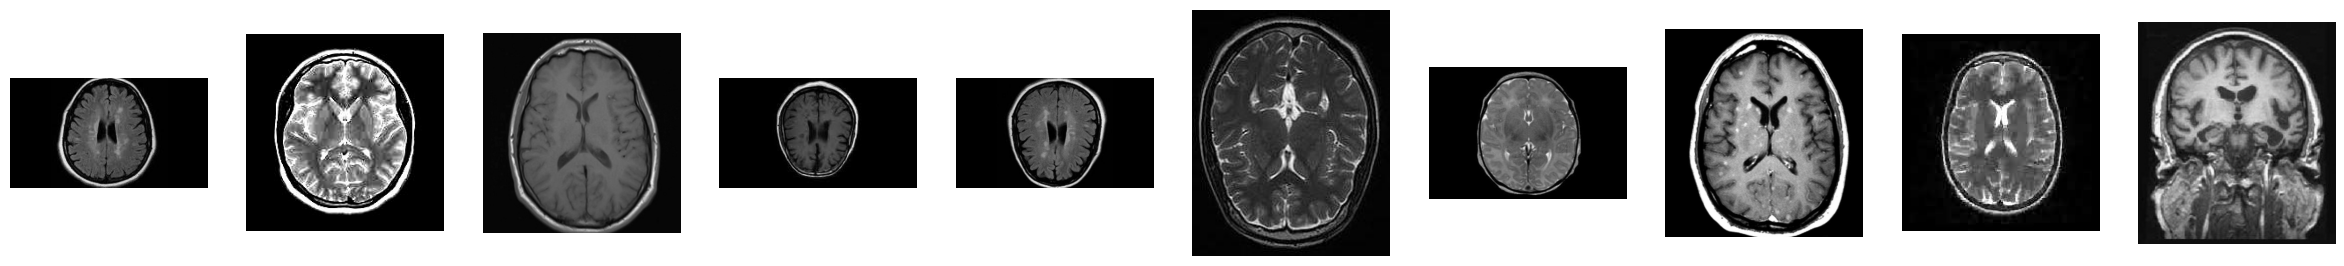

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Training/glioma


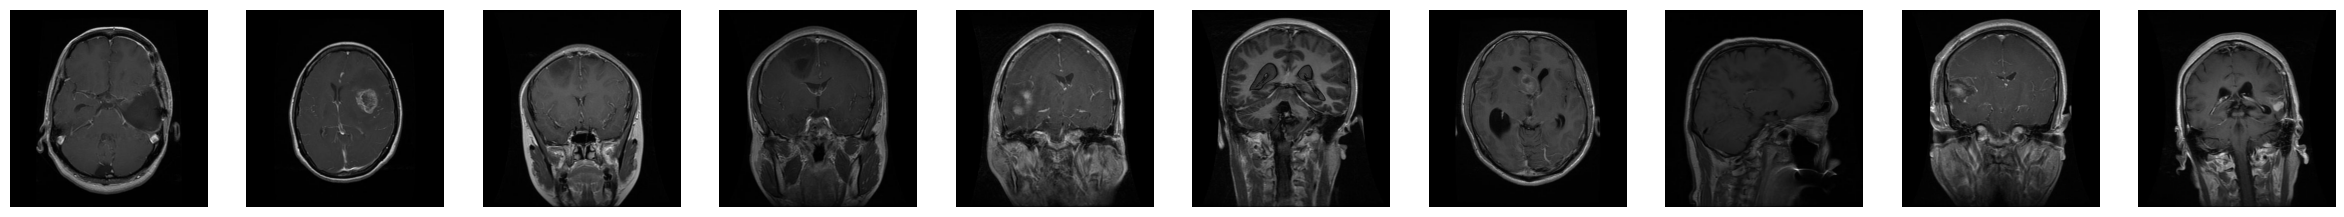

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Training/pituitary


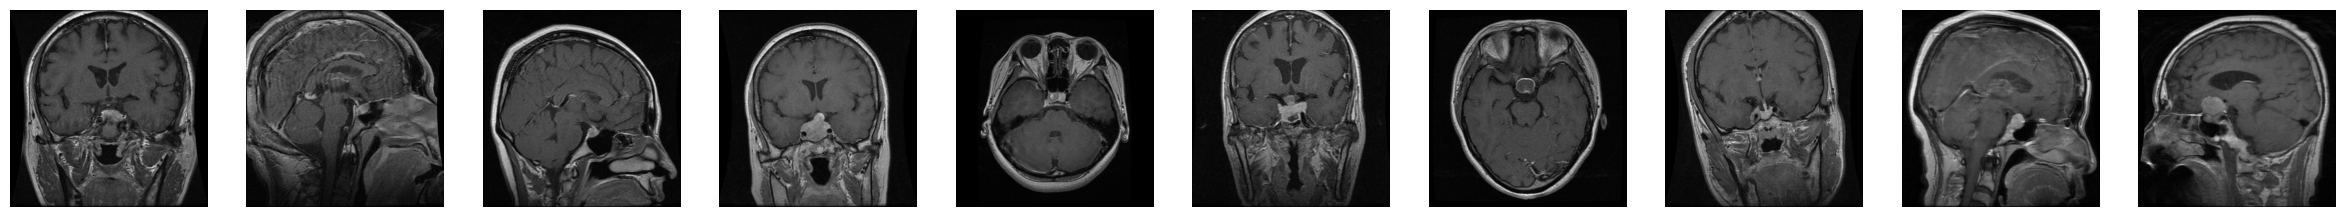

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Testing/meningioma


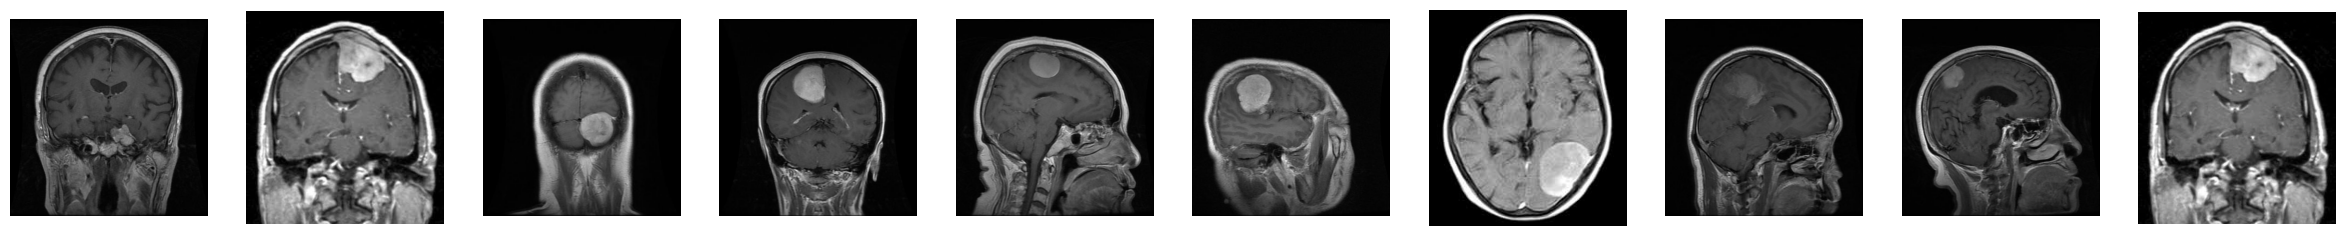

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Testing/notumor


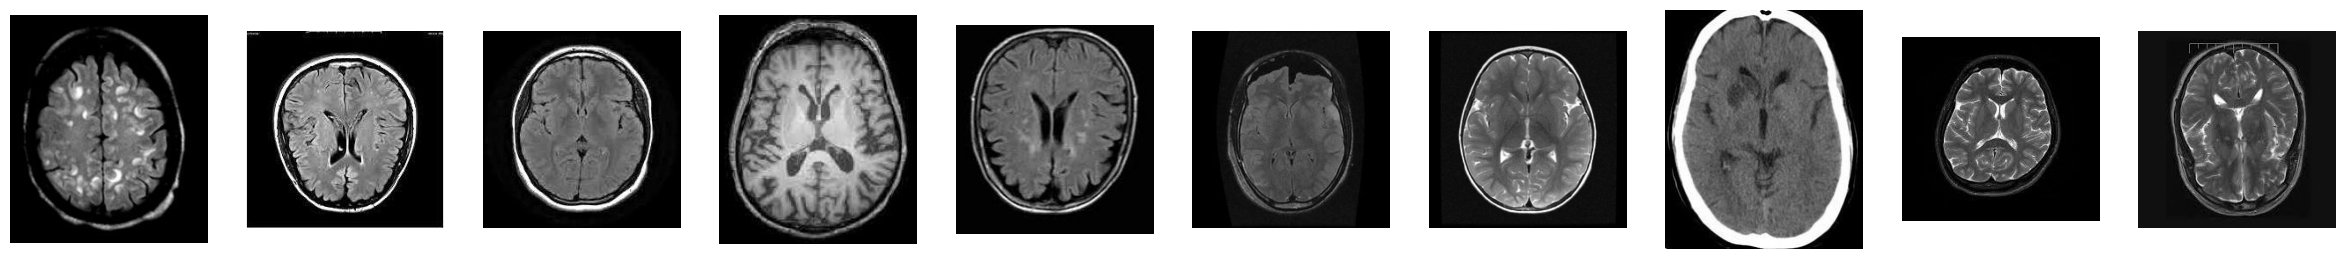

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Testing/glioma


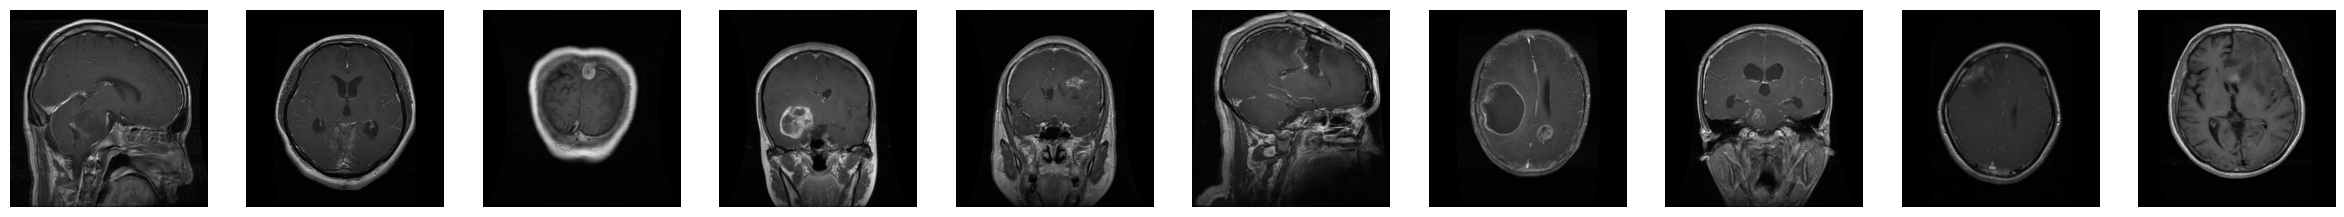

Folder: /content/Brain-Tumor-MRI-Dataset/dataset/Testing/pituitary


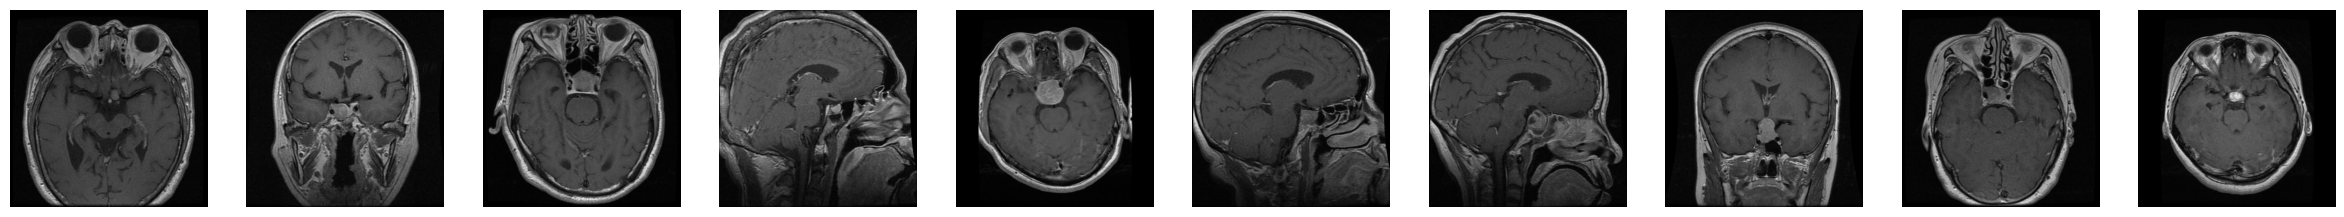

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path, images_per_class=10):
    images = {}
    for root, dirs, files in os.walk(folder_path):
        if files:
            images[root] = []
            for file in files:
                if len(images[root]) < images_per_class and file.endswith(('.png', '.jpg', '.jpeg')):
                    images[root].append(os.path.join(root, file))
    return images

def imshow(images):
    for folder, image_paths in images.items():
        plt.figure(figsize=(30,30))
        print(f'Folder: {folder}')
        for i, image_path in enumerate(image_paths):
            plt.subplot(1, len(image_paths), i+1)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage:
# dataset_path = "/path/to/your/dataset"  # replace with the path to your dataset
images = load_images_from_folder(dataset_path)
imshow(images)

In [ ]:
images['/content/Brain-Tumor-MRI-Dataset/dataset/Training/meningioma'][0]

'/content/Brain-Tumor-MRI-Dataset/dataset/Training/meningioma/Tr-me_1037.jpg'

In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/Brain-Tumor-MRI-Dataset/sample/Training/glioma/Tr-gl_0010.jpg"
image_path = images['/content/Brain-Tumor-MRI-Dataset/dataset/Training/meningioma'][0]
image_specifications = get_image_specifications(image_path)
print(image_specifications)

Image Format: JPEG
Image Mode: L
Image Size: (512, 512) pixels (Width: 512, Height: 512)
Image Colors: [(5711, 0), (2025, 1), (3263, 2), (11562, 3), (21569, 4), (23259, 5), (15485, 6), (9337, 7), (4843, 8), (2826, 9), (1791, 10), (1407, 11), (1177, 12), (1122, 13), (1015, 14), (1022, 15), (986, 16), (1013, 17), (972, 18), (977, 19), (1001, 20), (1046, 21), (1114, 22), (1139, 23), (1085, 24), (1155, 25), (1150, 26), (1206, 27), (1195, 28), (1305, 29), (1316, 30), (1363, 31), (1362, 32), (1430, 33), (1450, 34), (1582, 35), (1529, 36), (1678, 37), (1620, 38), (1677, 39), (1691, 40), (1859, 41), (1749, 42), (1754, 43), (1866, 44), (1868, 45), (1815, 46), (1862, 47), (1913, 48), (2056, 49), (2171, 50), (2138, 51), (2229, 52), (2268, 53), (2455, 54), (2361, 55), (2487, 56), (2512, 57), (2554, 58), (2679, 59), (2602, 60), (2646, 61), (2659, 62), (2735, 63), (2657, 64), (2580, 65), (2448, 66), (2433, 67), (2339, 68), (2233, 69), (2164, 70), (2069, 71), (2053, 72), (2037, 73), (1916, 74), (1714

## Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

# Hàm tiền xử lý và sao chép
def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Kiểm tra xem src_dir có phải là một thư mục không
    if os.path.isdir(src_dir):
        # Nếu dest_dir không tồn tại, tạo nó
        os.makedirs(dest_dir, exist_ok=True)

        # Lặp qua các tệp/thư mục trong src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # Nếu item là một thư mục, gọi hàm đệ quy
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # Nếu item là một tệp, áp dụng tiền xử lý và sao chép
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Định nghĩa hàm tiền xử lý của bạn ở đây
# def preprocess_func(img):
#     # TODO: Thêm bước tiền xử lý của bạn ở đây
#     return img
import os
import cv2
import numpy as np
import pywt
from shutil import copyfile

# Đường dẫn lưu trữ ảnh đã được xử lý
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/04_DWT'

# Tạo thư mục output nếu nó chưa tồn tại
os.makedirs(output_path, exist_ok=True)

# Lấy danh sách thư mục con trong dataset
child_folders = os.listdir(dataset_path)

def preprocess_func(image):
    # Áp dụng biến đổi sóng 2D
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs

    # Giảm nhiễu ở mức HH, LH, HL
    denoised_HH = pywt.threshold(HH, 0.5, mode='soft')
    denoised_LH = pywt.threshold(LH, 0.5, mode='soft')
    denoised_HL = pywt.threshold(HL, 0.5, mode='soft')
    thresh = np.std(LL)
    LL = pywt.threshold(LL, thresh)


    # Tạo lại ảnh từ các hệ số đã được xử lý
    coeffs = (LL, (denoised_LH, denoised_HL, denoised_HH))
    denoised_image = pywt.idwt2(coeffs, 'bior1.3')

    return denoised_image
# Sử dụng
dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/04_DWT'
preprocess_and_copy(dataset_path, output_path, preprocess_func)


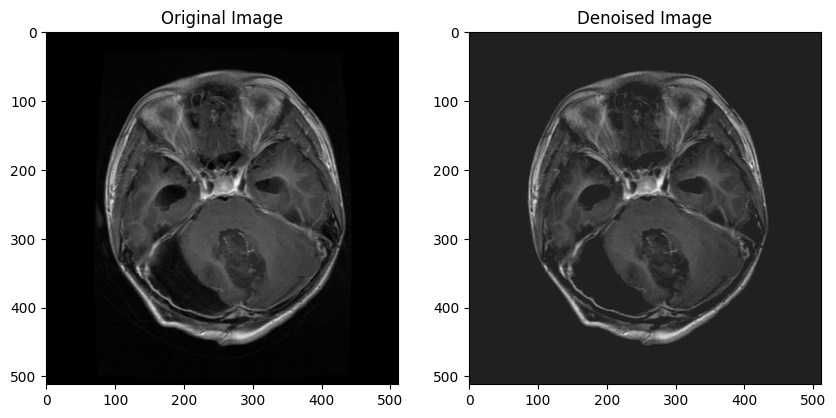

In [ ]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Brain-Tumor-MRI-Dataset/dataset/Testing/glioma/Te-glTr_0000.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
